# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 2. Простой анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`** и html-версии графиков (подробности в условии).
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания **используйте этот ноутбук в качестве основы, ничего не удаляя из него**. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 1.**

---

**Баллы за задание:**

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash; 80 баллов

---

In [ ]:
# Bot check

# HW_ID: fpmi_ad2
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2

<a target="_blank" href="https://www.yelp.com/">Yelp</a> — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

![Yelp_Logo_No_Outline_Color.jpg](attachment:Yelp_Logo_No_Outline_Color.jpg)

_____________

Вам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

В целях сокращения объема файла, текстовые отзывы пользователей не были включены.

Оригинальную версию датасета в формате `json` можно посмотреть по <a target="_blank" href="https://www.kaggle.com/yelp-dataset/yelp-dataset/data">ссылке</a>, но использовать нужно выданные данные.

_____________

**Что нужно сделать:**

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. <a target="_blank" href="https://yandex.ru/company/researches/2017/msk_mobile_map">Пример</a> с несколько другой задачей.
* А также найти рестораны с наилучшими отзывами.


*Далее в условии встречаются различные подсказки, как можно выполнить определенные части задачи. Вы можете их игнорировать и делать иным способом для получения **того же самого промежуточного результата**. Однако, если ваше решение окажется **значительно** менее эффективным (по скорости, количеству и красоте кода) по сравнению с предполагаемым, баллы могут быть снижены.*

------

#### 1. Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('./drive/MyDrive/yelp_data/yelp_business.csv', index_col=0)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. В таблице должен быть указан город (название) и количество компаний в этом городе.

*Подсказка.* Для выполнения стоит воспользоваться методами `groupby`, `count`, `sort_values`, `head`.

In [5]:
grouped_cities = df.groupby('city').size()
grouped_cities = grouped_cities.sort_values(ascending=False)
top = grouped_cities[:5]
top

city
Las Vegas     26775
Phoenix       17213
Toronto       17206
Charlotte      8553
Scottsdale     8228
dtype: int64

Пусть `N` &mdash; город с наибольшим количеством компаний. Оставьте в таблице только записи, соответствующие городу `N`. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ &mdash; широту.

<Axes: xlabel='longitude', ylabel='latitude'>

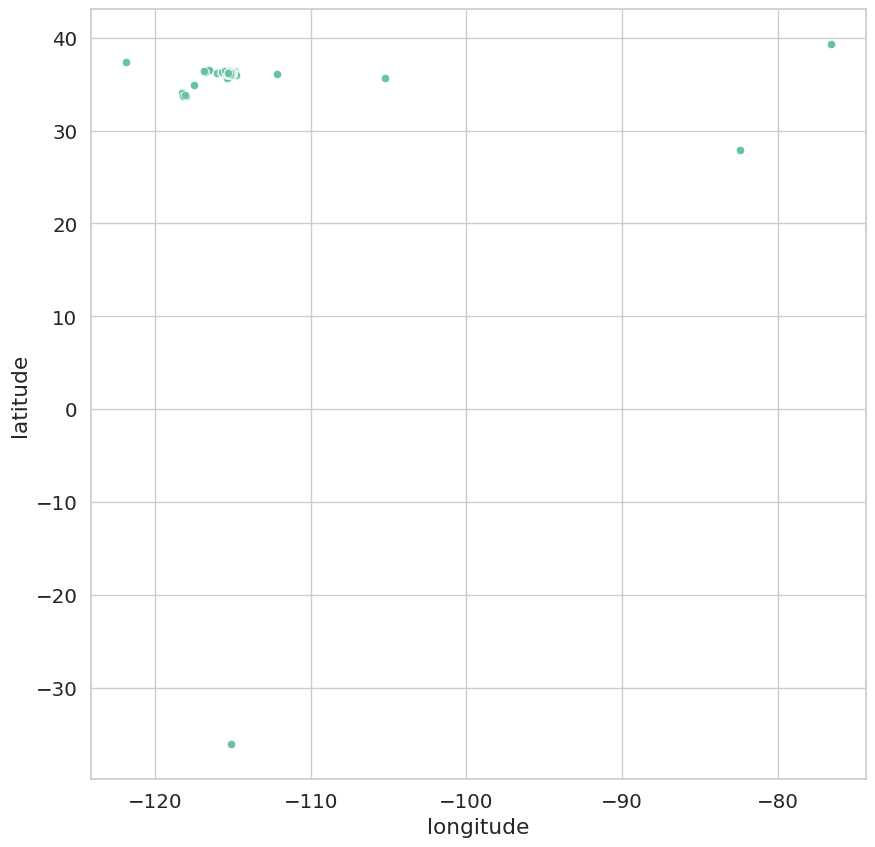

In [16]:
data = df.loc[df['city'] == 'Las Vegas']
plt.figure(figsize=(10, 10))
sns.scatterplot(x=data['longitude'], y = data['latitude'])

In [17]:
data = data.loc[(data['longitude'] >= -115.35) & (data['longitude'] <= -115.05) & (data['latitude'] >= 35.95) & (data['latitude'] <= 36.355)]
data.describe()

,latitude,longitude,is_open
count,26266.000000,26266.000000,26266.000000
mean,36.130755,-115.198412,0.824298
std,0.059404,0.065631,0.380574
min,35.950005,-115.349727,0.000000
25%,36.098709,-115.249467,1.000000
50%,36.126350,-115.191573,1.000000
75%,36.161848,-115.150360,1.000000
max,36.352668,-115.050062,1.000000


Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. На этом графике должны выделяться некоторые улицы.

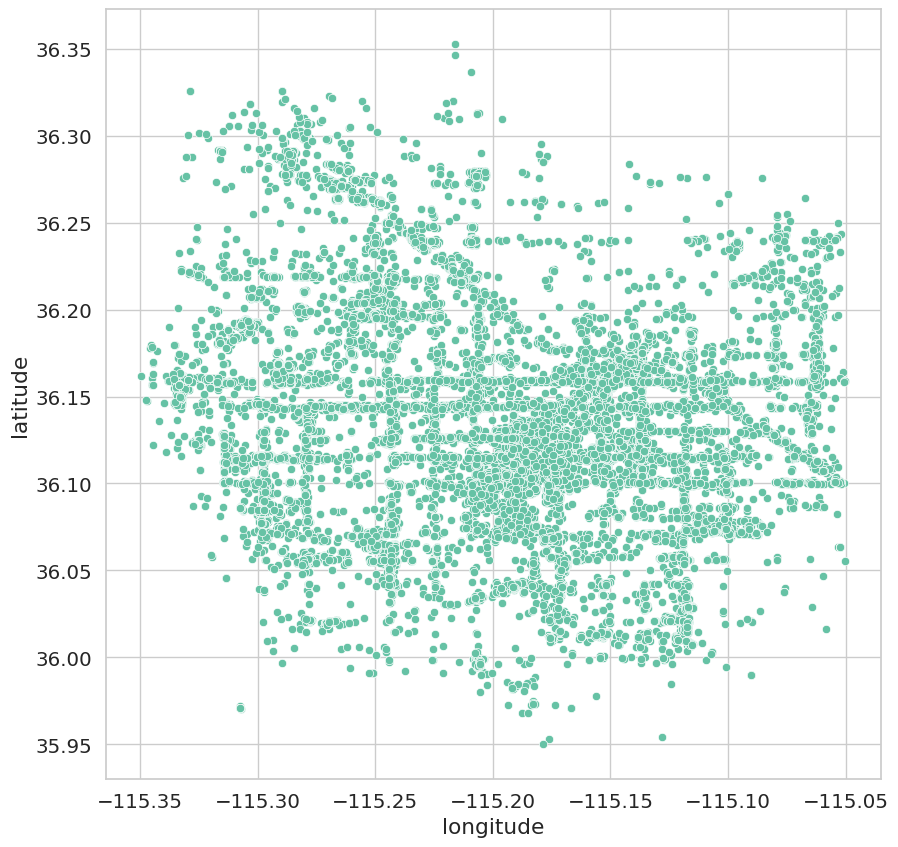

In [18]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=data['longitude'], y = data['latitude'])
plt.show()

Разберитесь с тем, как подгрузить интерактивную карту города в качестве фона графика. Можно пойти двумя следующими способами.
1. Изучить <a href="https://miptstats.github.io/courses/python/11_plotly.html" target="_blank">материалы</a> по библиотеке <a href="https://plotly.com/python/" target="_blank"><b>Plotly</b></a>. Возможно, потребуется также заглянуть в документацию.
1. Поразбираться с библиотекой <a href="https://github.com/python-visualization/folium" target="_blank"><b>Folium</b></a>. Посмотрите множество <a href="https://nbviewer.org/github/python-visualization/folium/tree/main/examples/" target="_blank">примеров</a>, может также помочь <a href="https://proglib.io/p/python-web-map" target="_blank">статья на русском</a>.

*Внимание!* Интерактивная карта может не сохраниться в ноутбуке, а если сохранится, то вес ноутбука может превзойти 20 Мб, и его не получится отправить боту. В любом случае **<u>необходимо сохранить карту в html и отправить ее отдельным файлом в бот.</u>** При этом каждый файл html должен не превышать 20 Мб, присылать файлы в архиве нельзя. Аналогично со всеми следующими интерактивными графиками в этом задании.

In [19]:
import plotly
import plotly.graph_objects as go
import plotly.express as px


In [20]:
fig = px.scatter_mapbox(
    data,  # таблица с данными
    lat='latitude', lon='longitude',  # колонки с координатами
    center=dict(lat=36.128138, lon=-115.2),  # центр карты
    zoom=10,  # масштаб карты
    mapbox_style="open-street-map",  # стиль карты
    title = 'Компании на карте Лас Вегаса',
    width = 700,
    height = 700
)
plotly.offline.plot(fig, filename='business_map1.html', show_link=False)
fig.show()

Если все получилось, вы молодцы! Далее в этой задаче тоже стройте интерактивные карты. Если нет желания разбираться с интерактивными графиками, можно построить статичные, но баллы будут снижены.

#### 2. Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [21]:
review = pd.read_csv('./drive/MyDrive/yelp_data/yelp_review.csv', index_col='business_id')
review.head()

,Unnamed: 0,stars
business_id,,
AEx2SYEUJmTxVVB18LlCwA,0,5
VR6GpWIda3SfvPC-lg9H3w,1,5
CKC0-MOWMqoeWf6s-szl8g,2,5
ACFtxLv8pGrrxMm6EgjreA,3,4
s2I_Ni76bjJNK9yG60iD-Q,4,4


В подгруженной таблице оценок оставьте только компании города `N`. Для этого установите значения `business_id` в качестве индекса у таблицы оценок и воспользуйтесь методом `loc`.

*Подсказка.* Чтобы индекс снова сделать полем таблицы, можно воспользоваться методом `reset_index`.

In [22]:
review = review.loc[data['business_id']]
review.describe()

,Unnamed: 0,stars
count,1.591096e+06,1.591096e+06
mean,2.621817e+06,3.742582e+00
std,1.517622e+06,1.444260e+00
min,5.000000e+00,1.000000e+00
25%,1.308830e+06,3.000000e+00
50%,2.612698e+06,4.000000e+00
75%,3.931666e+06,5.000000e+00
max,5.261640e+06,5.000000e+00


Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок.

*Подсказка.* Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [23]:
res = pd.DataFrame(columns = ['number of reviews', 'average rating'])
res['number of reviews'] = review.groupby('business_id').size()
res['average rating'] = review.groupby('business_id').mean()['stars']
res

,number of reviews,average rating
business_id,,
--9e1ONYQuAa-CB_Rrw7Tw,1451,4.088904
--DdmeR16TRb3LsjG0ejrQ,5,3.200000
--WsruI0IGEoeRmkErU5Gg,14,4.928571
--Y7NhBKzLTbNliMUX_wfg,8,4.875000
--e8PjCNhEz32pprnPhCwQ,19,3.473684
...,...,...
zzOo9n22fBbKAhbSpMzggA,26,3.230769
zzXuJF6UUT1kgTyCsmgDmQ,4,5.000000
zzjqFOujmM9surbMANZ_ag,3,5.000000


Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы. Красивые имена &mdash; то, что будет понятно простому человеку при чтении ваших результатов. Как именно их назвать &mdash; задача аналитика, то есть в данном случае ваша :)

In [24]:
res.head()

,number of reviews,average rating
business_id,,
--9e1ONYQuAa-CB_Rrw7Tw,1451,4.088904
--DdmeR16TRb3LsjG0ejrQ,5,3.200000
--WsruI0IGEoeRmkErU5Gg,14,4.928571
--Y7NhBKzLTbNliMUX_wfg,8,4.875000
--e8PjCNhEz32pprnPhCwQ,19,3.473684


Соедините две полученные ранее таблицы по компаниям города `N` в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index`. В одной из них это уже должно было быть сделано.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, а также две колонки со средней оценкой компаний и количеством оценок, которые вы посчитали выше.

*Подсказка.* Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.

In [25]:
data = data.set_index('business_id')
data = data[["latitude", "longitude", "categories", "name"]]
data = data.join(res)


Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$. Если у одной компании несколько филиалов с разными адресами, наносите на график все адреса.

In [26]:
fig = px.scatter_mapbox(
    data,  # таблица с данными
    lat='latitude', lon='longitude',  # колонки с координатами
    color = 'average rating',
    center=dict(lat=36.128138, lon=-115.2),  # центр карты
    zoom=10,  # масштаб карты
    mapbox_style="open-street-map",  # стиль карты
    color_continuous_scale='rdylgn',
    title = "Компании на карте Лас Вегаса с их средним рейтингом",
    width = 700,
    height = 700
)
fig.show()
plotly.offline.plot(fig, filename='business_las_vegas.html', show_link=False)

'business_las_vegas.html'

Чтобы получить районы города, то есть разделить город на "клетки", округлите значения широты и долготы, подобрав оптимальный размер района.

*Подсказка.* Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

In [27]:
data_new = data.copy()
data_new['longitude'] = np.round(data['longitude']*4, decimals=1)*0.25
data_new['latitude'] = np.round(data['latitude']*4, decimals=1)*0.25
data_new

,latitude,longitude,categories,name,number of reviews,average rating
business_id,,,,,,
kCoE3jvEtg6UVz5SOD3GVw,36.200,-115.275,Real Estate Services;Real Estate;Home Services...,"""BDJ Realty""",5,4.000000
OD2hnuuTJI9uotcKycxg1A,36.200,-115.250,Shopping;Sporting Goods,"""Soccer Zone""",9,1.444444
VBHEsoXQb2AQ76J9l8h1uQ,36.075,-115.125,Shopping;Jewelry;Watch Repair;Local Services,"""Alfredo's Jewelry""",23,4.739130
1Jp_hmPNUZArNqzpbm7B0g,36.050,-115.275,Home Services;Lighting Fixtures & Equipment;Lo...,"""Task Electric""",20,4.450000
DPQnTnNw2PJj7DdENM98Cw,36.100,-115.050,Nurseries & Gardening;Home & Garden;Shopping,"""Star Nursery""",25,3.680000
...,...,...,...,...,...,...
swjz4q8gI79Ndg4APuHEUA,36.125,-115.225,Real Estate Services;Home Services;Property Ma...,"""Stonegate Real Estate Services""",15,4.466667
pUhU5ohYv65g8B47dTXAKA,36.175,-115.125,Coffee & Tea;Food,"""Starbucks""",35,2.400000
sH9WsMj8sNTTSAUWv4UEEg,36.050,-115.250,Mobile Phone Accessories;Mobile Phones;Electro...,"""Sprint Store""",35,3.857143


Для получения средней оценки компаний по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений &mdash; оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

*Замечание.* В качестве среднего можно было бы посчитать как общее среднее по всем оценкам всех компаний, так и среднее по компаниям их средних оценок. В чем разница этих подходов? Какой из них необходимо использовать в данном случае?

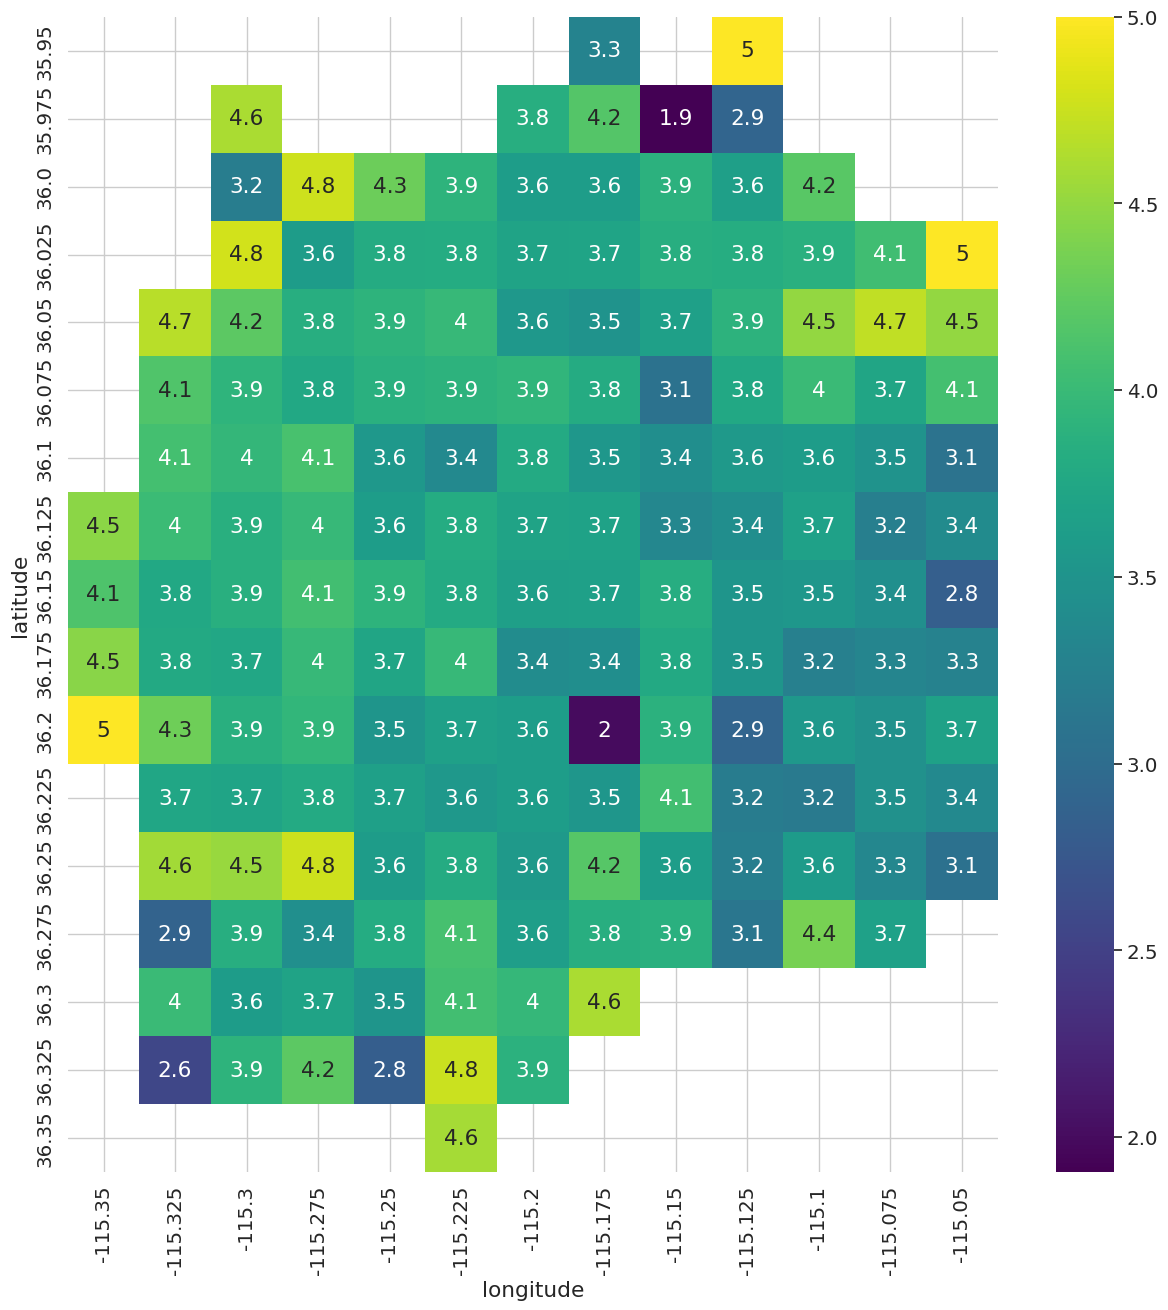

In [28]:
table = pd.pivot_table(data_new, index ='latitude', columns = 'longitude', values = 'average rating', aggfunc = 'mean')
plt.figure(figsize=(15, 15))
sns.heatmap(table, cmap = "viridis", annot=True)
plt.show()

Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых,  на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

**Ответ:** <...>

1) Из-за небольшого количества компаний, среднее значение может сильно изменяться при появлении новых данных о районе или необъективных отзывах.

2) Из-за автоматического выбора минимума и максимума и линейного распределения цветовой палитры между значениями от 2 до 5 сдвинулось среднее значение 3.5 отличное от абсолютной шкалы от 1 до 5 и при появлении новых данных новым цветам могут соответствовать новые значения. Так же есть часть значений, которых нет в данных, например, от 2.1 до 2.5, в то время как большая часть данных сосредоточена в промежутке от 3.5 до 4.2 и не различима на графике, то есть визуально график становится не информативным.
  


Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

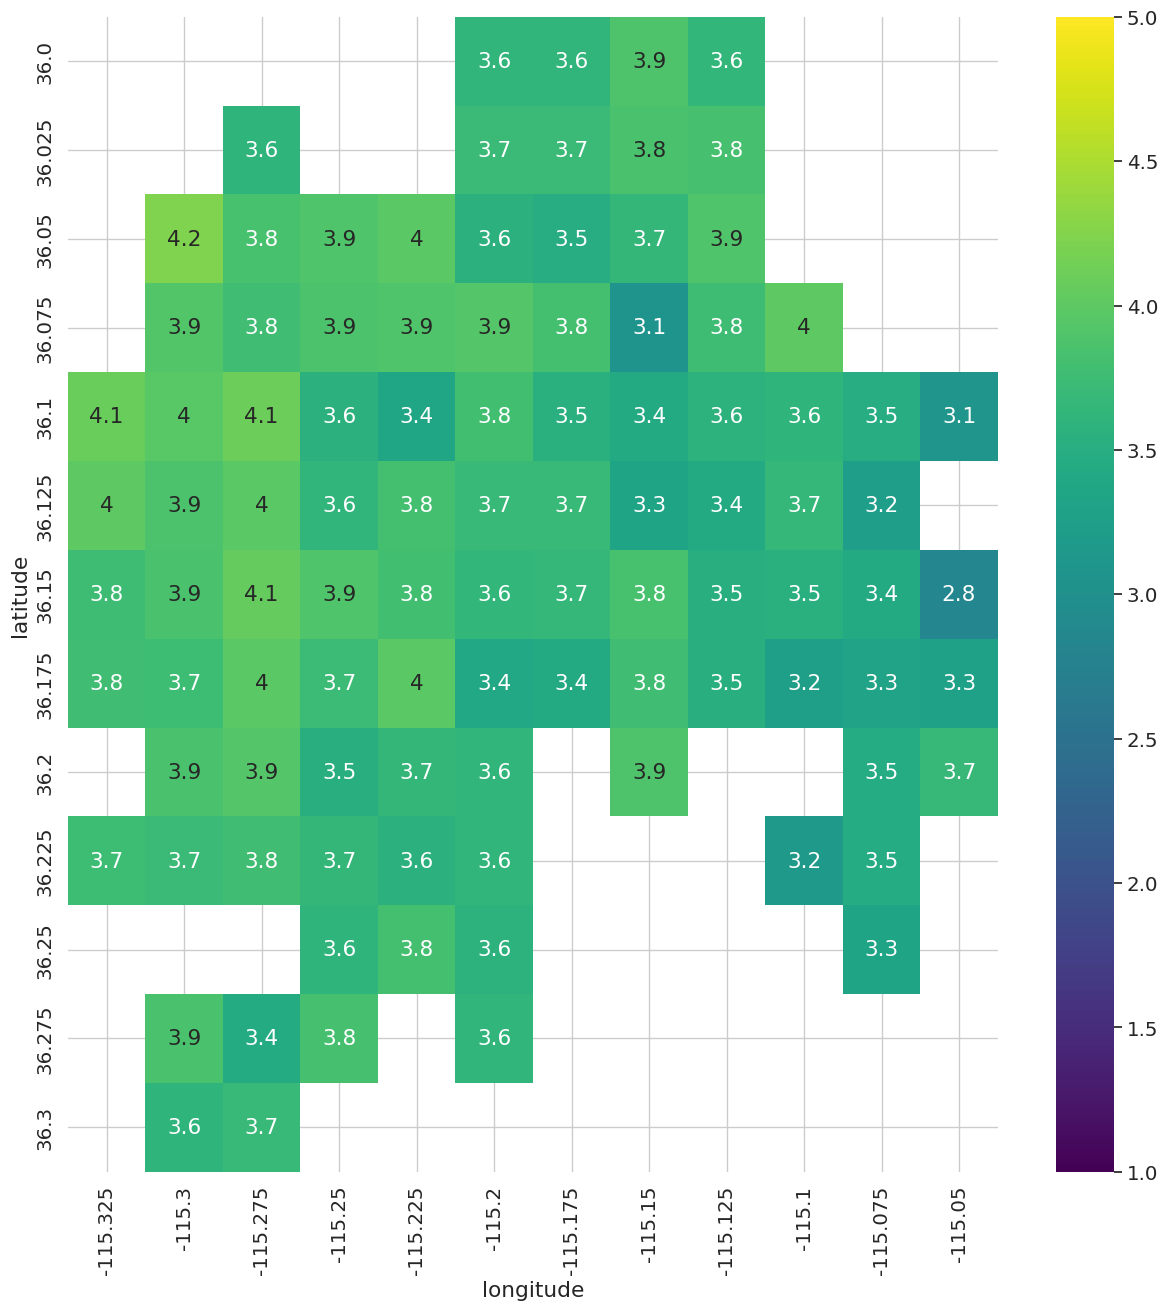

In [29]:
data_new1 = data_new.groupby(['longitude', 'latitude']).size()
data_new1 = data_new1[data_new1 > 30].reset_index()
data_new1.columns = ['longitude', 'latitude', 'count']
merged_data = pd.merge(data_new, data_new1, on=['longitude', 'latitude'], how='inner')
merged_data
table1 = pd.pivot_table(merged_data, index ='latitude', columns = 'longitude', values = 'average rating',  aggfunc = 'mean')
plt.figure(figsize=(15, 15))
sns.heatmap(table1, vmin = 1, vmax = 5, cmap = "viridis", annot=True)
plt.show()

Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:** <...>

После удаления районов с небольшим количеством оценок и установления абсолютной шкалы на втором графике данные стали более однородные без выбросов, что видно по цвету графику.
Но по обоим графикам можно увидеть, как средняя оценка компаний убывает с запада на восток.

#### 3. Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `restaurant`. Обратите внимание, что в анализе данных часто нет четкого формата данных. Например, данное слово может быть написано как с большой буквы, так и с маленькой; может как разделяться `;`, так и не разделяться. При возникновении недопонимания стоит посмотреть данные.

Составьте таблицу, в которой будет информация о всех ресторанах города `N`, для которых имеется не менее $5$ отзывов. Далее постройте heatmap-график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

<Axes: xlabel='longitude', ylabel='latitude'>

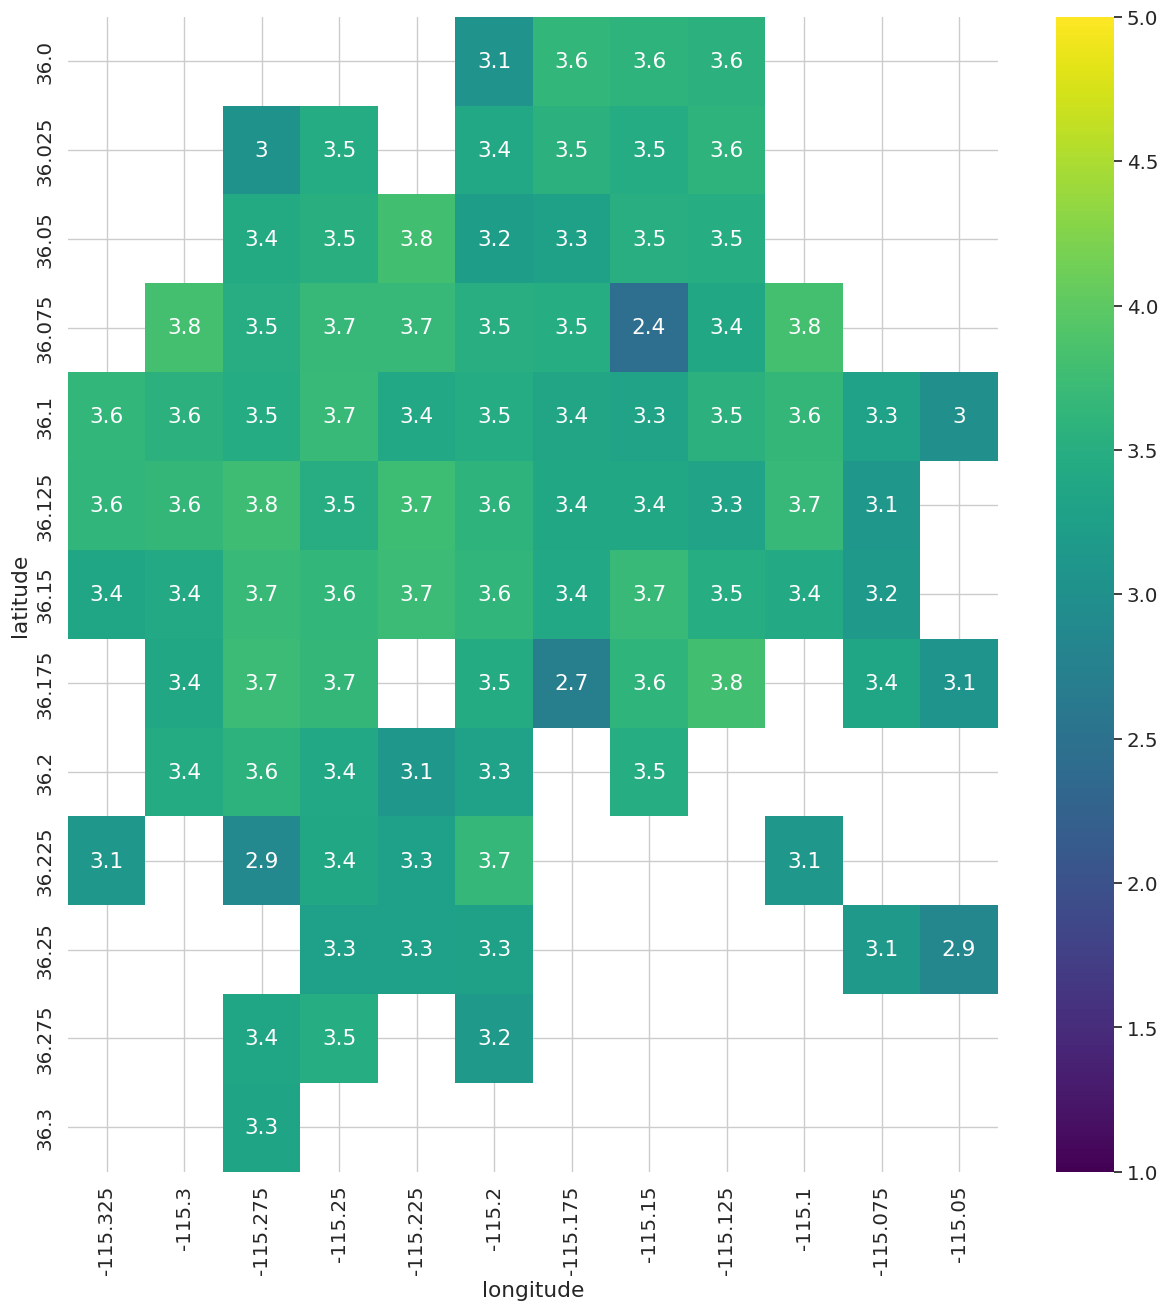

In [41]:
data_rest = data_new.loc[data['categories'].str.contains('Restaurant')]
data_rest = data_rest.loc[data_rest['number of reviews'] >= 5]
data_rest1 = data_rest.groupby(['longitude', 'latitude']).size()
data_rest1 = data_rest1[data_rest1 >= 10].reset_index()
data_rest1.columns = ['longitude', 'latitude', 'count']
merged_data_rest = pd.merge(data_rest, data_rest1, on=['longitude', 'latitude'], how='inner')
table_rest = pd.pivot_table(merged_data_rest, index ='latitude', columns = 'longitude', values = 'average rating',  aggfunc = 'mean')
plt.figure(figsize=(15, 15))
sns.heatmap(table_rest, vmin = 1, vmax = 5, cmap = "viridis", annot=True)

Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:** <...>

Если среди отзывов есть некоторое количество необъективных(то есть, очень низких или наоборот высоких), то эти отзывы сильнее будут влиять на среднюю оценку ресторанов с меньшим количеством отзывов могут и сильнее испортят данные. Аналогично работает и для средней оценки районов: выбросы в данных сильнее искажают результат.

Кот Василий из города `N` очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [33]:
sp_data_rest = data_rest.loc[(data_rest['number of reviews'] >= 50)].sort_values('average rating', ascending=False).head(10)
restaurants = data_rest.loc[(data_rest['number of reviews'] >= 50) & (data_rest['average rating'] >= 4.7)]
sp_data_rest

,latitude,longitude,categories,name,number of reviews,average rating
business_id,,,,,,
iBPyahdJRP5y0t25fF2W9w,36.125,-115.175,Food Tours;Restaurants;Event Planning & Servic...,"""Lip Smacking Foodie Tours""",179,4.966480
Fmij544FE1iOruoxI41kew,36.150,-115.150,Restaurants;Burgers;Food Stands;Sandwiches;Hot...,"""Pepito Shack""",65,4.907692
qw9SyduMZ53KB6GlBQqvZQ,36.125,-115.175,Vietnamese;Bubble Tea;Sandwiches;Food;Coffee &...,"""Bosa Boba Cafe""",55,4.890909
k9b96JXlNewj36ddrce9Jw,36.175,-115.275,Tacos;Street Vendors;Farmers Market;Vegetarian...,"""Garden Grill""",91,4.868132
IhNASEZ3XnBHmuuVnWdIwA,36.050,-115.250,Cafes;Tea Rooms;Food;Bubble Tea;Restaurants;De...,"""Brew Tea Bar""",1165,4.848069
k5ddmLvAKKw9zSusRPM2cQ,36.125,-115.100,Food Stands;Hot Dogs;Caterers;Restaurants;Amer...,"""Poppa Naps BBQ""",104,4.836538
8fFTJBh0RB2EKG53ibiBKw,36.100,-115.100,Restaurants;Breakfast & Brunch;Cafes,"""Zenaida's Cafe""",180,4.833333
l1GJnB9TJgGgEeI4at1M0A,36.100,-115.150,Caterers;Mexican;Restaurants;Food;Event Planni...,"""El Frescos Cocina Mexicana""",191,4.816754
hFT3HuxVZJb1uYEsYfp-0A,36.150,-115.225,Adult Entertainment;Lounges;Hookah Bars;Restau...,"""Blaqcat Ultra Hookah Lounge""",63,4.809524


Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

In [42]:
fig = px.scatter_mapbox(
    restaurants,
    lat = 'latitude', lon = 'longitude',
    zoom = 10,
    mapbox_style = 'open-street-map',
    color = 'average rating',
    color_continuous_scale='rdylgn',
    # color_discrete_sequence=['blue'],
    title = "Рестораны в Лас-Вегасе (синим цветом отмечены предпочтения Василия)",
    # size_max = 10,
    width = 700,
    height = 700
)

fig.add_trace(px.scatter_mapbox(
    sp_data_rest,
    lat='latitude',
    lon='longitude',
    text = 'name',
    color_discrete_sequence = ['blue'],
    size_max=5,
    zoom=10,
).data[0])

fig.show()
plotly.offline.plot(fig, filename='las_vegas_restaurants.html', show_link=False)

'las_vegas_restaurants.html'

In [ ]:
sns.heatmap(table_rest, vmin = 1, vmax = 5, cmap = "viridis", annot=True)

Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Вывод:** <...>

Как мы видим, средняя оценка ресторанов, выбранных Василием, превышает 4.8, что подтверждает его требовательность к заведениям.

По первой карте Лас-Вегаса с компаниями видно, что большая плотность заведений наблюдается вдоль Лас-Вегас Стрип, что подтверждает ее статус главной улицы города. Согласно карте ресторанов, в каждом квартале находится не более одного заведения с рейтингом большим 4,7, и они распределены случайным образом.

При сравнении тепловых карт средних оценок всех компаний и только ресторанов видно, что распределение районов с хорошими ресторанами не совпадает с распределением средних оценок компаний. Более того, средние оценки ресторанов, в большинстве районов, оказываются ниже средних оценок компаний. Это говорит о том, что средние оценки ресторанов не всегда коррелируют с общими средними оценками компаний в данном районе. Однако, можно отметить, что в юго-восточной части города наблюдается либо малое количество компаний, либо компании с небольшим числом отзывов, что может указывать на молодой, только развивающийся район.